#Post Test - Madaline

Madaline (Many Adaptive Linear Neuron) merupakan sebuah arsitektur jaringan saraf tiruan yang tersusun dari sekumpulan Adaline. Berbeda dengan Adaline, Madaline merupakan sebuah jaringan multilayer yang terdiri dari input, hidden, dan output layer.

Pada praktikum sebelumnya, kita sudah menerapkan Madaline dengan fungsi aktivasi bipolar pada pengujiannya. Hal ini dikarenakan sebelumnya kita menggunakan Madaline untuk kasus klasifikasi.

Pada Post Test kali ini, teman-teman akan menerapkan Madaline untuk kasus regresi polinomial orde 2.
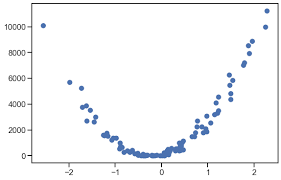



## Kode (jangan diubah)

Fungsi Training Madaline

In [260]:
import numpy as np

def madaline_fit(train_data,train_target,alpha=0.1,max_epoch=-1):
    w = np.random.random((2,2))
    v = np.array([0.5,0.5])
    b = np.random.random(2)
    b = np.append(b,0.5)
    epoch = 0
    aktivasi_linstep = np.vectorize(linstep)
    aktivasi_relu = np.vectorize(relu)
    weight_updated = True

    while weight_updated == True and epoch < max_epoch:
        weight_updated = False

        # Lengkapi kode di bawah ini
        for data, target in zip(train_data, train_target):
            z_in = np.dot(w.T, data) + b[:2]
            z = aktivasi_relu(z_in)
            y_in = np.dot(v, z) + b[2]
            y = aktivasi_linstep(y_in)
            error = target - y

            if error > 1:
                weight_updated = True
                index = np.where((z_in > 0) | (z_in < 0))[0]
                b[index] = b[index] + alpha * error
                w[:, index] = w[:, index] + alpha * error * data.reshape(-1, 1)

        epoch = epoch + 1
    return (w, v, b, epoch)

## Masalah

Diketahui terdapat persamaan kuadrat yang memetakan x ke f(x). Teman-teman diharapkan bisa menerapkan Madaline untuk menyelesaikan permasalahan polinomial berdasarkan data yang diberikan.

Berikut beberapa petunjuk yang bisa diperhatikan.

1.   Buat fungsi aktivasi relu dengan nama relu() dan linstep dengan nama linstep().
2.   Gunakan fungsi Relu untuk hidden layer dan linstep pada output layer.
3.   Nilai output / hasil prediksi tidak harus sama persis dengan hitungan matematikanya, tetapi setidaknya mendekati.
4.   Teman-teman bebas menentukan epoch, learning rate, dan parameter lainnya selama proses training berjalan dan menghasilkan prediksi yang sesuai.



Data

In [261]:
# pada x(fitur), indeks kedua memiliki nilai yang sama seperti indeks pertama
# contoh: f(x,y) = ax^2 + by^2 + cxy + dx + ey + f
# x=y
# f(x,y) = 1x^2 + 2y^2 + 3xy + 4x + 5y + 6
# f(x,y) = 6x^2 + 9x + 6

z = np.array([[-5,-5],[-4.5,-4.5],[-4,-4],[-3.5,-3.5],[-3,-3],[-2.5,-2.5],[-2,-2],
              [-1.5,-1.5],[-1,-1],[-0.5,-0.5],[0,0],[0.5,0.5],[1,1],[1.5,1.5],[2,2],
              [2.5,2.5],[3,3],[3.5,3.5],[4,4],[4.5,4.5],[5,5]])

fx_values = []

for x, y in z:
    fx = 4*(x**2) + 4*(y**2) + 5*x*y + 1*x + 4*y + 8
    fx_values.append(fx)

fx_values = np.array(fx_values)
print(fx_values)

[308.   248.75 196.   149.75 110.    76.75  50.    29.75  16.     8.75
   8.    13.75  26.    44.75  70.   101.75 140.   184.75 236.   293.75
 358.  ]


Jangan ubah kode visualisasi fungsi kuadrat

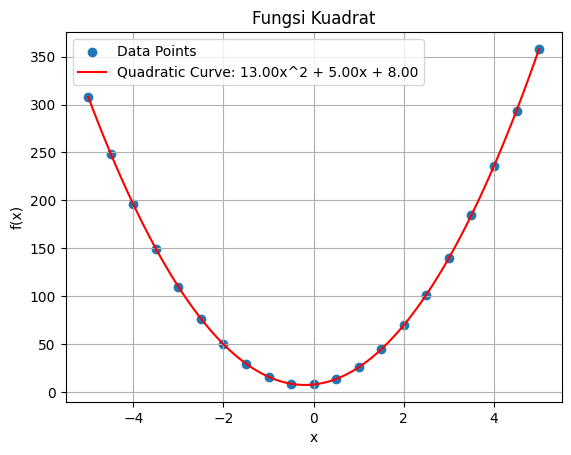

In [262]:
import matplotlib.pyplot as plt

# Fit a quadratic curve to the data
coefficients = np.polyfit(z[:,0], fx_values, 2)
a, b, c = coefficients

# Generate x values for the curve
x_curve = np.linspace(-5, 5, 100)
# Calculate corresponding y values using the quadratic equation
y_curve = a * x_curve**2 + b * x_curve + c

# Plot the data points and the fitted quadratic curve
plt.scatter(z[:,0], fx_values, label='Data Points')
plt.plot(x_curve, y_curve, label=f'Quadratic Curve: {a:.2f}x^2 + {b:.2f}x + {c:.2f}', color='red')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Fungsi Kuadrat')
plt.legend()
plt.grid(True)
plt.show()

Buat fungsi aktivasi linear bernama linstep()

In [263]:
# Diisi praktikan
def linstep(x):
        return x

Buat fungsi aktivasi relu bernama relu()

In [264]:
# Diisi praktikan
def relu(x):
  if x<0:
    y=np.minimum(0,x)
    return -1*y
  else:
    return np.maximum(0,x)

Buat fungsi pengujian bernama madaline_predict()

In [265]:
# Clue: z menggunakan aktivasi relu dan y menggunakan aktivasi linstep

def madaline_predict(w,v,b,test_data):
  # Dilengkapi praktikan
  predictions = []
  aktivasi_relu = np.vectorize(relu)
  aktivasi_linstep = np.vectorize(linstep)

  for data in test_data:
    z_in = np.dot(w.T, data) + b[:2]
    z = aktivasi_relu(z_in)
    y_in = np.dot(v.T, z) + b[2]
    y = aktivasi_linstep(y_in)

    predictions.append(y)

  return np.array(predictions)

Uji dengan x_test

In [266]:
# Isi parameter max_epoch dan alpha dan analisis hasilnya oleh praktikan

x_test = z

(w, v, b, epoch) = madaline_fit(z, fx_values, alpha=0.0069, max_epoch=3)
output = madaline_predict(w, v, b, x_test)

print('\nOutput:', output)
print('Epoch:', epoch)


Output: [174.3633069  153.59433516 132.82536342 112.05639168  91.28741994
  70.5184482   49.74947646  28.98050472   8.21153298  13.55743876
  34.32641051  55.09538225  75.86435399  96.63332573 117.40229747
 138.17126921 158.94024095 179.70921269 200.47818443 221.24715617
 242.01612791]
Epoch: 3


Jangan ubah kode visualisasi hasil regresi

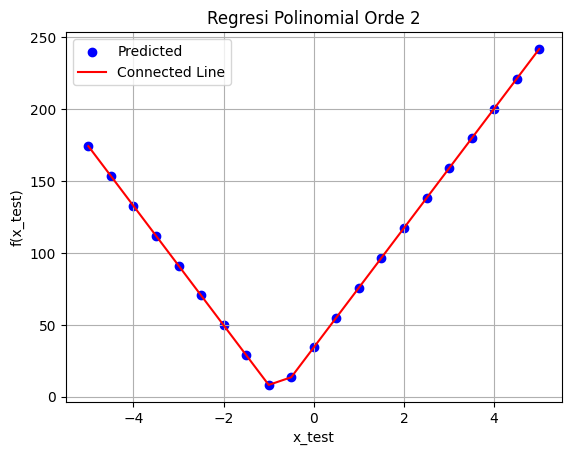

In [267]:
# Extract the first feature from x_test
x_test_first_feature = x_test[:, 0]

# Sort the points based on the first feature
sorted_indices = np.argsort(x_test_first_feature)
sorted_x_test_first_feature = x_test_first_feature[sorted_indices]
sorted_output = output[sorted_indices]

# Create a scatter plot
plt.scatter(x_test_first_feature, output, label='Predicted', color='blue')

# Plot a line connecting the sorted points
plt.plot(sorted_x_test_first_feature, sorted_output, color='red', label='Connected Line')

plt.xlabel('x_test')
plt.ylabel('f(x_test)')
plt.title('Regresi Polinomial Orde 2')
plt.legend()
plt.grid(True)
plt.show()

Jangan ubah kode visualisasi perbandingan nilai true dengan hasil prediksi

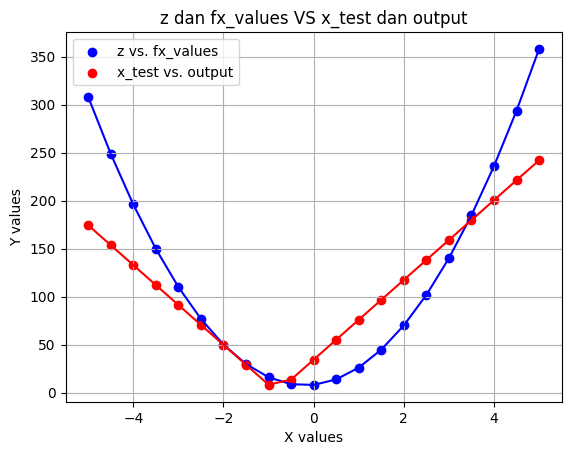

In [268]:
import matplotlib.pyplot as plt

# Assuming z, fx_values, x_test, and output are defined as mentioned in your question

# Create a scatter plot for z vs. fx_values
plt.scatter(z[:, 0], fx_values, label='z vs. fx_values', color='blue')

# Create a scatter plot for x_test vs. output
plt.scatter(x_test[:, 0], output, label='x_test vs. output', color='red')

# Plot lines connecting the dots for z vs. fx_values
plt.plot(z[:, 0], fx_values, linestyle='-', color='blue')

# Plot lines connecting the dots for x_test vs. output
plt.plot(x_test[:, 0], output, linestyle='-', color='red')

plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('z dan fx_values VS x_test dan output')
plt.legend()
plt.grid(True)
plt.show()

## Analisis Hasil

1. Dari data dan hasil pengujian regresi, jabarkan fungsi kuadrat yang sesuai!

2. Bagaimana teman-teman melakukan tuning JST Madaline hingga bisa melakukan regresi polinomial orde 2?

1. Setelah dilakukan pengujian regresi dengan menggunakan data z dan target output fx_values, kita dapat melakukan fitting kuadrat menggunakan metode polynomial regression untuk menemukan fungsi kuadrat yang sesuai dengan data. Melalui pendekatan ini, kita memperoleh fungsi kuadrat yang menggambarkan hubungan yang tepat antara variabel input dan output, sehingga model dapat memprediksi dengan akurasi yang lebih baik terhadap distribusi data yang ada.

2. Agar bisa melakukan regresi polinomial orde 2 memerlukan Tuning, beberapa langkah pengoptimalan pada parameter pelatihan dan arsitektur jaringan. Proses tuning ini melibatkan penyesuaian arsitektur jaringan, serta pengaturan nilai learning rate dan jumlah epoch untuk mencapai konvergensi yang diinginkan. Selain itu, pemilihan fungsi aktivasi REL-U berperan sangat penting untuk memastikan pelatihan data yg sesuai dan menghindari resiko overfitting.


ARION SYEMAEL SIAHAAN

225150207111060





